## What is this notebook for?

This scripts it to test:
- the reshaping of the 3d array
- test of histogram calculations
- test of cumulative histogram comparison
- select best feature

NOTE: due to updates of the functions, some of the cells might don't work anymore

#### Import libraries

In [551]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_resample_4d_array import resample_4d_array
from functions.function_plot_3d_array_colored import plot_3d_array_colored
from functions.function_get_feature_positions import get_feature_positions

#### create an entire list of arrays

the shape should be the following (sample, x, y, z)


Resampling in progress...


100%|██████████| 100/100 [00:00<00:00, 177.76it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

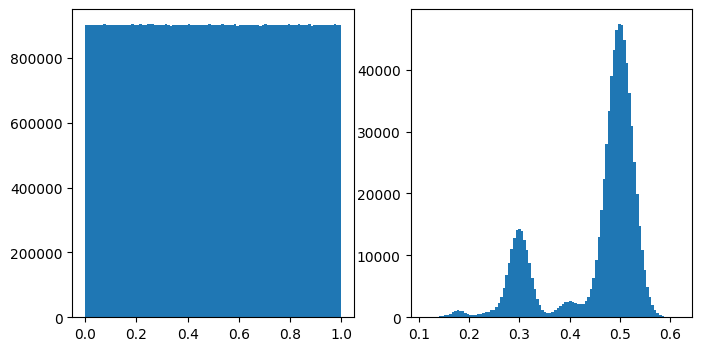

In [552]:
# create an entire list of arrays
# the shape should be the following (sample, x, y, z) = (100, 91, 109, 91)
arr_big = np.random.rand(100, 91, 109, 91)

# reshape the list of arrays
arr_small = resample_4d_array(arr_big, 5)

# plot histogram of big and small arr
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small.flatten(), bins=100)
plt.show

In [553]:
arr_small.shape

(100, 19, 22, 19)

#### ground truth array

In [554]:
# array which represents the ground truth with 0 and 1
np.random.seed(20)
arr_gt = np.random.rand(100)
arr_gt[arr_gt < 0.5] = 0
arr_gt[arr_gt >= 0.5] = 1

# count the number of 0 and 1 in the ground truth
print(f"number of 0: {np.count_nonzero(arr_gt == 0)}",
      f"number of 1: {np.count_nonzero(arr_gt == 1)}")

# change some elements of the arr_small to bigger values if the corresponding element in the arr_gt is 1
# arr_small[arr_gt == 1] = arr_small[arr_gt == 1] * 1.1

number of 0: 43 number of 1: 57


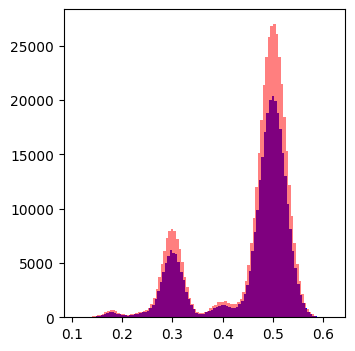

In [555]:
# plot histogram of arr_small, colors are different for 0 and 1
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.hist(arr_small[arr_gt == 0].flatten(), bins=100, color='blue')
ax.hist(arr_small[arr_gt == 1].flatten(), bins=100, color='red', alpha=0.5)
plt.show()

### manipulate data to see importance of a feature

In [556]:
# flatten the arr_small into a 2d array (keep the sample dimension)
arr_small_2d = arr_small.reshape(arr_small.shape[0], -1)
print(f"shape of arr_small_2d: {arr_small_2d.shape}")

shape of arr_small_2d: (100, 7942)


In [557]:
# create a histogram along the sample dimension 
df_small = (pd.DataFrame(arr_small_2d)
            # add a column "ground_truth" as categorical which contains the ground truth
            .assign(ground_truth=pd.Categorical(arr_gt))
            )
# df_small.hist(bins=100, figsize=(8, 4))
df_small

,0,1,2,3,4,5,6,7,8,9,...,7933,7934,7935,7936,7937,7938,7939,7940,7941,ground_truth
0,0.189839,0.296598,0.285967,0.262554,0.317154,0.299343,0.297130,0.303267,0.333769,0.282858,...,0.193170,0.260104,0.250107,0.274102,0.240042,0.216761,0.224579,0.266273,0.163485,1.0
1,0.183206,0.268829,0.282771,0.310850,0.294875,0.281216,0.299478,0.302365,0.311653,0.296188,...,0.230032,0.248955,0.237498,0.248835,0.221304,0.236125,0.212803,0.236101,0.136871,1.0
2,0.168961,0.270143,0.297165,0.295302,0.298485,0.312192,0.299218,0.294625,0.292821,0.270088,...,0.238531,0.244867,0.249772,0.206527,0.223448,0.174494,0.249366,0.260691,0.165656,1.0
3,0.181964,0.282192,0.325292,0.282990,0.283440,0.294286,0.282356,0.274001,0.287923,0.291460,...,0.225059,0.214628,0.212359,0.228372,0.241650,0.265033,0.236616,0.207619,0.126276,1.0
4,0.202013,0.285502,0.286136,0.332544,0.308577,0.299707,0.326078,0.334954,0.257836,0.278917,...,0.225409,0.253488,0.264870,0.216429,0.254754,0.206351,0.276426,0.238056,0.159891,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.172048,0.324307,0.283142,0.296552,0.287014,0.318465,0.320005,0.342345,0.244641,0.325109,...,0.248152,0.255612,0.245585,0.237430,0.248770,0.262371,0.210976,0.266339,0.147213,1.0
96,0.182483,0.276507,0.277414,0.273056,0.266007,0.318961,0.316303,0.293534,0.293107,0.302489,...,0.258354,0.240602,0.260657,0.253240,0.220277,0.228311,0.245035,0.243019,0.126648,1.0
97,0.208568,0.285831,0.284993,0.307061,0.300591,0.339777,0.300866,0.300789,0.279549,0.253510,...,0.209911,0.267561,0.207030,0.247176,0.263299,0.212614,0.237358,0.265257,0.163348,1.0
98,0.173587,0.284835,0.265067,0.335255,0.319009,0.274848,0.277250,0.304315,0.278372,0.303077,...,0.237387,0.218262,0.234750,0.240745,0.255862,0.242305,0.261705,0.227427,0.152188,1.0


<Axes: >

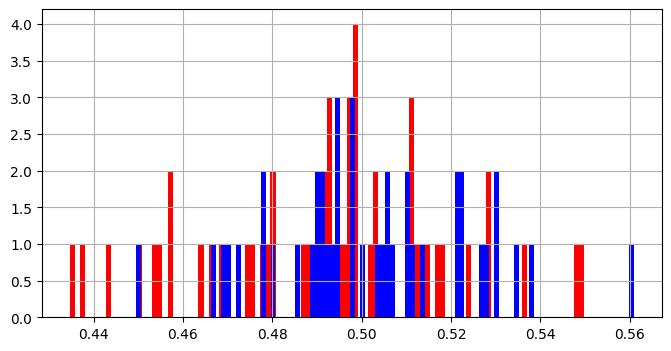

In [558]:
# create histogram for one column
col_nr = 501
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


<Axes: >

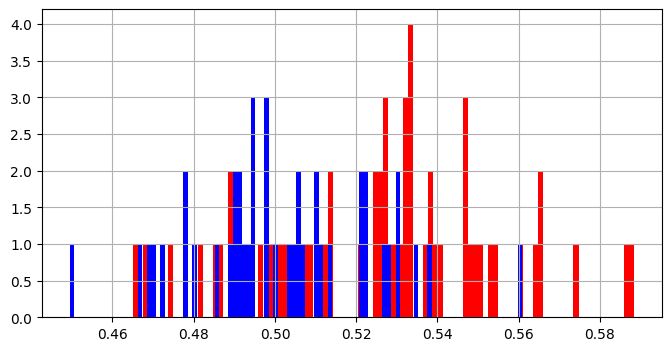

In [559]:
# increase two values of the column for the ground truth 1
changed_col = [col_nr, col_nr * 2]
df_small.loc[df_small["ground_truth"]==1 , changed_col] *= 1.07

# create histogram for one column
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')

### Analysis with mean of histogram

In [560]:
# calculate difference between the two histograms
diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col_nr].mean() 
              - df_small.loc[df_small["ground_truth"]==0 , col_nr].mean())
print(f"difference between the two histograms: {diff}")

difference between the two histograms: 0.025578557837248606


column number = 1002, difference = 0.02783967391025699
column number = 501, difference = 0.025578557837248606
column number = 1778, difference = 0.02063270182559135
column number = 4969, difference = 0.018767583207469685
column number = 496, difference = 0.017663360893737323
column number = 5720, difference = 0.017465480657734678
column number = 7013, difference = 0.017038268973676385
column number = 3623, difference = 0.01687202319392722
column number = 5451, difference = 0.016762354087679454
column number = 3467, difference = 0.016691405722822794


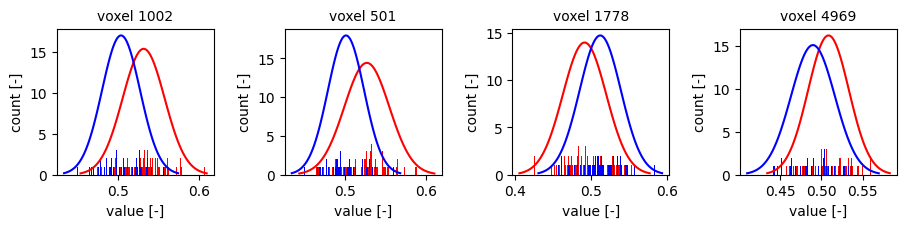

In [561]:
# find the columns with the biggest difference
diff_dict = {}
for col in range(df_small.shape[1] - 1):  # -1 because the last column is the ground truth
    diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col].mean() 
                  - df_small.loc[df_small["ground_truth"]==0 , col].mean())
    diff_dict[col] = diff
diff_list = sorted(diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {diff_list[i][0]}, difference = {diff_list[i][1]}")

# plot the 10 columns with the biggest difference
fig = plt.figure(figsize=(16, 4))
for i in range(4):
    col = diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], bins=100, color='red')
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], bins=100, color='blue')
    # add bell curve
    mu = df_small.loc[df_small["ground_truth"]==1 , col].mean()
    sigma = df_small.loc[df_small["ground_truth"]==1 , col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma), color='red')
    mu = df_small.loc[df_small["ground_truth"]==0 , col].mean()
    sigma = df_small.loc[df_small["ground_truth"]==0 , col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma), color='blue')
    # add title
    ax.set_title(f"voxel {col}", fontsize=10)
    ax.set_xlabel(f"value [-]")
    ax.set_ylabel(f"count [-]")

plt.tight_layout()
plt.show()

# save the figure as svg
# cut the figure to t
fig.savefig("../figures/histogram.svg", format="svg", bbox_inches="tight", pad_inches=0.05)


### Analysis with diff of cumulative histogram

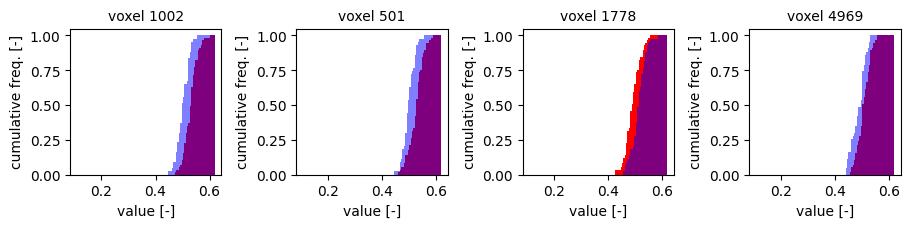

In [562]:
# min and max values of the entire array to set the same range for all histograms (to make sure the binning is the same)
max_value = np.max(df_small.iloc[:, :-1].values)
min_value = np.min(df_small.iloc[:, :-1].values)

# create a cumulative histogram
fig = plt.figure(figsize=(16, 4))
for i in range(4):
    col = diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], density=True,
            bins=100, color='red', cumulative=True, range=(min_value, max_value))
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], density=True,
            bins=100, color='blue', cumulative=True, range=(min_value, max_value), alpha=0.5)
    # add title, x and y label
    ax.set_title(f"voxel {col}", fontsize=10)
    ax.set_xlabel(f"value [-]")
    ax.set_ylabel(f"cumulative freq. [-]")
plt.tight_layout()
plt.show()

fig.savefig("../figures/cumulative_histogram.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

In [563]:
# calculate the difference between the two cumulative histograms including 
# a resampling (done with the range argument) so that the two histograms have the same bins
cum_diff_dict = {}
for col in df_small.columns[:-1]:  # -1 because the last column is the ground truth
    cum_diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0])
                    - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0]))
    cum_diff_dict[col] = cum_diff.sum()
cum_diff_list = sorted(cum_diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {cum_diff_list[i][0]}, area of diff. = {cum_diff_list[i][1]}")

column number = 1002, area of diff. = 1065.977498481184
column number = 501, area of diff. = 1005.710219415115
column number = 1778, area of diff. = 790.6874671089074
column number = 4969, area of diff. = 725.1307725928846
column number = 3606, area of diff. = 699.6454072431254
column number = 496, area of diff. = 693.4744225515224
column number = 5720, area of diff. = 677.4458908850145
column number = 7013, area of diff. = 661.0166459268441
column number = 3467, area of diff. = 656.8492276935438
column number = 5451, area of diff. = 654.8456612352406


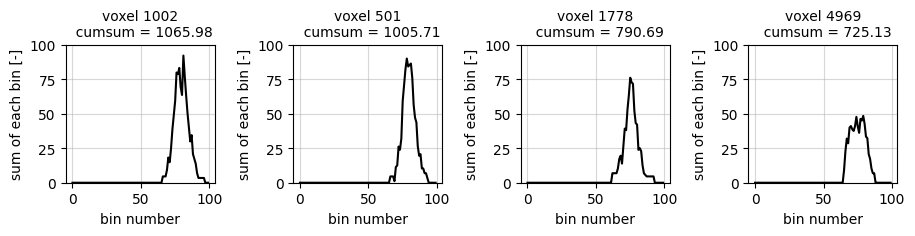

In [564]:
fig = plt.figure(figsize=(16, 4))
for i in range(4):
    col = cum_diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col], 
                                         bins=100, density=True, 
                                         range=(min_value, max_value)  # resample to have same binning
                                         )[0]) 
                  - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col], 
                                           bins=100, density=True,
                                           range=(min_value, max_value)  # resample to have same binning
                                           )[0]))
    ax.plot(diff, color='black')
    ax.set_ylim(0, 100)

    ax.grid(alpha=0.5)
    ax.set_title(f"voxel {col}\n  cumsum = {diff.sum():.2f}", fontsize=10)
    ax.set_xlabel(f"bin number")
    ax.set_ylabel(f"sum of each bin [-]")

plt.tight_layout()
plt.show()

fig.savefig("../figures/cumulative_histogram_diff.svg", format="svg", bbox_inches="tight", pad_inches=0.05)

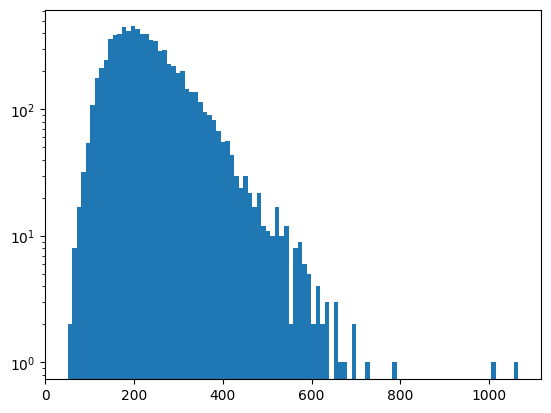

In [565]:
# plot histogram of cum_diff_list
plt.hist([x[1] for x in cum_diff_list], bins=100, log=True);

In [566]:
# create and print list of columns with the biggest difference
feature_list = [cum_diff_list[i][0] for i in range(14)]
print(feature_list)

feature_list_values = [cum_diff_list[i][1] for i in range(14)]
print(feature_list_values)


[1002, 501, 1778, 4969, 3606, 496, 5720, 7013, 3467, 5451, 2383, 3623, 4849, 6966]
[1065.977498481184, 1005.710219415115, 790.6874671089074, 725.1307725928846, 699.6454072431254, 693.4744225515224, 677.4458908850145, 661.0166459268441, 656.8492276935438, 654.8456612352406, 650.6782430019409, 638.0157029853982, 635.2107099437633, 630.9631490521355]
